In [136]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('SF Listings - Combined.csv', index_col=0)
del data['Term']
del data['URL']
del data['Source']
del data['Rented']
data['Date'] = pd.to_datetime(data['Date'])

# create year dummy variables (because date isn't very intuitive variable)
data["Year"] = pd.DatetimeIndex(data["Date"]).to_period('Y')

# create dummy variables using get_dummies, then exclude the first dummy column
year_dummies = pd.get_dummies(data.Year, prefix='Year').iloc[:, :-1]

# create dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies, year_dummies], axis=1)

data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Sqft,Date,Year,Neighborhood_Bayview,Neighborhood_Berkeley,Neighborhood_Bernal Heights,...,Neighborhood_Visitacion Valley,Neighborhood_Walnut Creek,Neighborhood_West Oakland,Neighborhood_Western Addition,Neighborhood_Westwood Park,Neighborhood_Yerba Buena,Year_2011,Year_2012,Year_2013,Year_2014
Address,,,,,,,,,,,,,,,,,,,,,
539 Octavia Street #9,Hayes Valley,0,1,1500,180,2015-03-18,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #11,Hayes Valley,0,1,1600,200,2015-03-30,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #14,Hayes Valley,0,1,1850,221,2015-05-14,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #12,Hayes Valley,0,1,1800,240,2015-04-16,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #13,Hayes Valley,0,1,1995,280,2015-02-01,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# filter out any outliers, defined as rent >$10k or >2,500 sq ft

data = data[(data.Sqft <= 2500) & (data.Price <= 8000) & (data.Bedrooms <= 4) & (data.Bathrooms <= 3)]

In [138]:
# create X and y
feature_cols = list(set(data.columns) - set(['Year','Neighborhood','Date','Price']))

X = data[feature_cols]
y = data.Price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print lm.intercept_
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((lm.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y))
print zip(feature_cols, lm.coef_)

# calculate predictions for the data set and plot errors
predictions = lm.predict(X)
errors = predictions-y
errors.name = 'Error'
#zip(data.index,y,predictions,errors)

1418.81517696
Residual sum of squares: 279935.24
Variance score: 0.80
[('Neighborhood_Buena Vista', -158.58408384013376), ('Neighborhood_Nob Hill', 508.24927570434568), ('Neighborhood_Mission Dolores', 809.18656559797409), ('Neighborhood_Clarendon Heights', -3.946953293650113e-12), ('Neighborhood_Inner Sunset', 255.69938452041811), ('Neighborhood_Golden Gate Heights', 123.8220908220909), ('Neighborhood_Outer Richmond', -390.88869840289055), ('Neighborhood_Bernal Heights', -924.88650619521695), ('Neighborhood_Westwood Park', -460.94820547207058), ('Neighborhood_Stonestown', -1066.7854194019142), ('Neighborhood_Presidio', 1090.2500607942457), ('Neighborhood_Oakland', -1228.8444686109174), ('Neighborhood_Russian Hill', -7.0705538309666809e-12), ('Neighborhood_South Beach', 561.58318196818755), ('Neighborhood_Eureka Valley', 380.2683928853387), ('Neighborhood_Rincon Hill', 569.47048090855515), ('Neighborhood_Downtown San Francisco', -598.67524323198688), ('Neighborhood_North Beach', -334.4

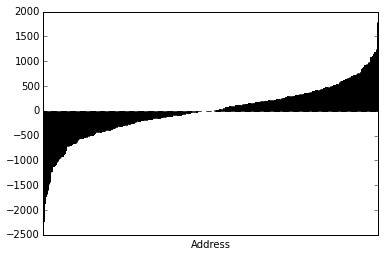

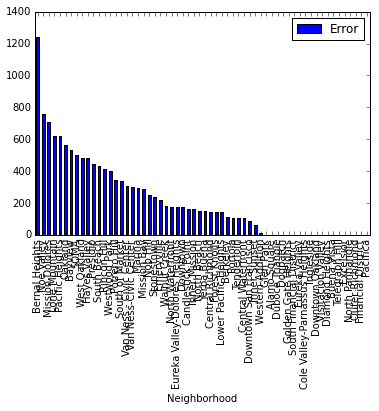

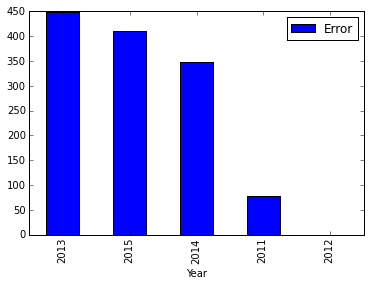

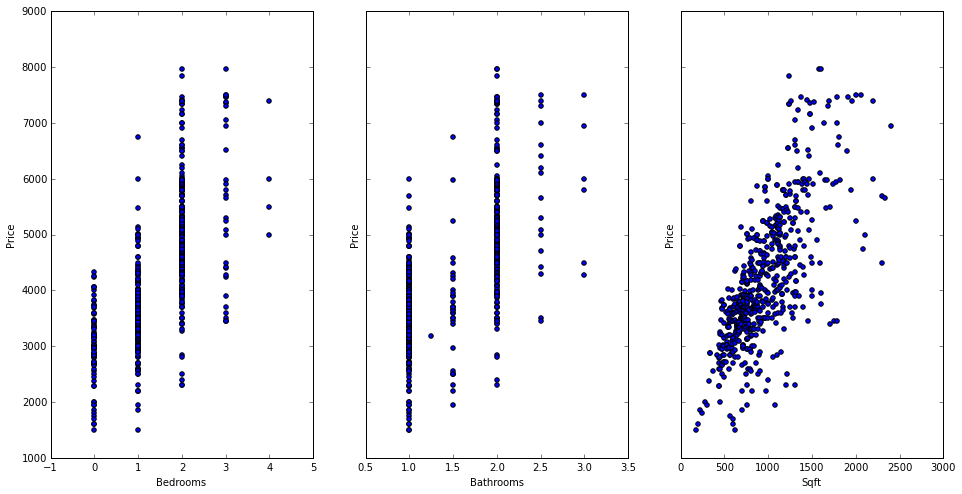

In [139]:
# visualize the relationship between the features and the response using scatterplots
errors.sort()
errors.plot(kind='bar').get_xaxis().set_ticks([])

# show errors by neighborhood to see if there are any neighborhoods with funky differences

hooderrors = data[['Neighborhood']]

errors = predictions-y
errors.name = 'Error'

hooderrors = pd.concat([hooderrors,errors.abs()],axis=1)

hood_group = hooderrors.groupby('Neighborhood')

import numpy
def median(lst):
    return numpy.median(numpy.array(lst))

error_avg = hood_group.median()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')

# show errors by year to see if there are any years with funky differences

yearerrors = data[['Year']]

yearerrors = pd.concat([yearerrors,errors.abs()],axis=1)

year_group = yearerrors.groupby('Year')
error_avg = year_group.mean()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Bedrooms', y='Price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Bathrooms', y='Price', ax=axs[1])
data.plot(kind='scatter', x='Sqft', y='Price', ax=axs[2])



In [140]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
table = ListTable()

dtype = [('Effect', 'S100'), ('Coefficient', float)]

# round to pennies
round_coef = map(round,lm.coef_,[2]*len(lm.coef_))
x = np.array(zip(feature_cols, round_coef),dtype=dtype)
x.T
x = np.sort(x,axis=0,order='Coefficient')

table.append(['Effect','Coefficient'])
for i in x:
    table.append(i)

print "Intercept: $"+`round(lm.intercept_)`
table

Intercept: $1419.0


Effect,Coefficient
Neighborhood_Downtown Oakland,-2471.8
Neighborhood_Visitacion Valley,-2410.63
Neighborhood_Portola,-1723.12
Neighborhood_Pacifica,-1618.45
Neighborhood_Candlestick Point,-1568.76
Neighborhood_Walnut Creek,-1501.57
Neighborhood_Glen Park,-1493.88
Neighborhood_Diamond Heights,-1429.89
Neighborhood_Emeryville,-1306.04
Neighborhood_West Oakland,-1284.77
